# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

This project utilised the DDPG (Deep Deterministic Policy Gradient) algorithm, that is described in this [article](https://arxiv.org/abs/1509.02971)

### Import necessary packages

In [1]:
import datetime
import time
import random
import copy
from collections import namedtuple, deque
from unityagents import UnityEnvironment
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

### Start the environment

In [2]:
env = UnityEnvironment(file_name='Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain brains which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of +0.1 is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of 33 variables corresponding to position, rotation, velocity, and angular velocities of the arm. Each action is a vector with four numbers, corresponding to torque applicable to two joints. Every entry in the action vector must be a number between -1 and 1.


In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### Set parameters

BUFFER_SIZE = int(1e5) This is a replay buffer. A large Replay Buffer is important for successful learning.DDPG uses a replay buffer to sample experience to update neural network parameters. During each trajectory roll-out, we save all the experience tuples (state, action, reward, next_state) and store them in a finite-sized cache — a “replay buffer.” Then, we sample random mini-batches of experience from the replay buffer when we update the value and policy networks. 

BATCH_SIZE = 256 - the size of the batch for learning the policy. The batch size parameter plays an important role in DDPG. Larger batch size allows more samples to be seen. This [article](https://arxiv.org/pdf/1708.04133.pdf) suggests that larger batch size improves performance of DDPG algoritm.

GAMMA = 0.99 - discount factor. The discount factor is a measure of how far ahead in time the algorithm looks. Nearly always arbitrarily chosen by researchers to be near the 0.9 point. 

TAU = 1e-3  - for soft update of target parameters

LR_ACTOR = 1e-4  and LR_CRITIC = 1e-4 - learning rates of the actor and learning rate of the critic, number that is used for adam optimizer. [Article](https://medium.com/octavian-ai/which-optimizer-and-learning-rate-should-i-use-for-deep-learning-5acb418f9b2)

WEIGHT_DECAY = 0.0 with weight decay set to zero, I got better performance.

N_LEARN_UPDATES = 10  is the number of learning updates

N_TIME_STEPS = 20 means to do an update every n time step


In [5]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 256         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor
LR_CRITIC = 1e-4        # learning rate of the critic
WEIGHT_DECAY = 0.0      # L2 weight decay

N_LEARN_UPDATES = 10     # number of learning updates
N_TIME_STEPS = 20       # every n time step do update

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Creating class Actor that will act on behalf of the agent and class Critic which "criticize" our class Actor

The Actor model consists of two fully connected layers with 256 and 128 units with relu activation and tanh activation. The network's initial dimension is the same as the state size.


The Critic model is similar to Actor model, it has two fully connected layers with 256 and 128 units with leaky_relu activation. The critic network's initial dimension is the sum of the state size and action size.


In [6]:
def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=256, fc2_units=128):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return torch.tanh(self.fc3(x))


class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=256, fc2_units=128):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units+action_size, fc2_units)
        self.fc3 = nn.Linear(fc2_units, 1)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        xs = F.leaky_relu(self.fc1(state))
        x = torch.cat((xs, action), dim=1)
        x = F.leaky_relu(self.fc2(x))
        return self.fc3(x)

### Creating class Agent that will represent our agent

In [7]:
class Agent():
    """Interacts with and learns from the environment."""
    memory = None
    actor_local = None
    actor_target = None
    actor_optimizer = None

    critic_local = None
    critic_target = None
    critic_optimizer = None

    def __init__(self, state_size, action_size, random_seed):
        """Initialize an Agent object.
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)

    
        # initialize Class level Actor Network
        if Agent.actor_local is None:
            Agent.actor_local = Actor(state_size, action_size, random_seed).to(device)
        if Agent.actor_target is None:
            Agent.actor_target = Actor(state_size, action_size, random_seed).to(device)
        if Agent.actor_optimizer is None:
            Agent.actor_optimizer = optim.Adam(Agent.actor_local.parameters(), lr=LR_ACTOR)
        self.actor_local = Agent.actor_local
        self.actor_target = Agent.actor_target
        self.actor_optimizer = Agent.actor_optimizer

        # Initilise Class levell Critic Network
        if Agent.critic_local is None:
            Agent.critic_local = Critic(state_size, action_size, random_seed).to(device)
        if Agent.critic_target is None:
            Agent.critic_target = Critic(state_size, action_size, random_seed).to(device)
        if Agent.critic_optimizer is None:
            Agent.critic_optimizer = optim.Adam(Agent.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)
        self.critic_local = Agent.critic_local
        self.critic_target = Agent.critic_target
        self.critic_optimizer = Agent.critic_optimizer

        # Noise process
        self.noise = OUNoise(action_size, random_seed)

        # Replay memory - only intitialise once per class
        if Agent.memory is None:
            print("Initialising ReplayBuffer")
            Agent.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
#         else:
#             print("Sharing ReplayBuffer %s", Agent.memory)

    def step(self, time_step, state, action, reward, next_state, done):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        Agent.memory.add(state, action, reward, next_state, done)

        # only learn every n_time_steps
        if time_step % N_TIME_STEPS != 0:
            return

        # Learn, if enough samples are available in memory
        if len(Agent.memory) > BATCH_SIZE:
            for i in range(N_LEARN_UPDATES):
                experiences = Agent.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.noise.sample()
        return np.clip(action, -1, 1)

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)

    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

### Train the agent with ddpg

Initialising ReplayBuffer
Episode 1	Score: 0.00	Average Score: 0.00.00
Episode 2	Score: 0.00	Average Score: 0.00.00
Episode 3	Score: 0.00	Average Score: 0.00.00
Episode 4	Score: 0.05	Average Score: 0.01.05
Episode 5	Score: 0.42	Average Score: 0.09.42
Episode 6	Score: 0.00	Average Score: 0.08.00
Episode 7	Score: 0.55	Average Score: 0.15.55
Episode 8	Score: 1.33	Average Score: 0.29.33
Episode 9	Score: 0.00	Average Score: 0.26.00
Episode 10	Score: 0.70	Average Score: 0.3070
Episode 11	Score: 0.34	Average Score: 0.3134
Episode 12	Score: 0.00	Average Score: 0.2800
Episode 13	Score: 0.07	Average Score: 0.2707
Episode 14	Score: 0.33	Average Score: 0.2733
Episode 15	Score: 1.39	Average Score: 0.3539
Episode 16	Score: 0.14	Average Score: 0.3314
Episode 17	Score: 0.58	Average Score: 0.3558
Episode 18	Score: 0.54	Average Score: 0.3654
Episode 19	Score: 0.11	Average Score: 0.3411
Episode 20	Score: 0.02	Average Score: 0.3302
Episode 21	Score: 0.00	Average Score: 0.3100
Episode 22	Score: 0.00	Averag

Episode 181	Score: 7.14	Average Score: 3.754
Episode 182	Score: 5.90	Average Score: 3.780
Episode 183	Score: 8.80	Average Score: 3.840
Episode 184	Score: 7.51	Average Score: 3.901
Episode 185	Score: 7.29	Average Score: 3.949
Episode 186	Score: 4.96	Average Score: 3.946
Episode 187	Score: 6.38	Average Score: 3.988
Episode 188	Score: 5.13	Average Score: 3.993
Episode 189	Score: 5.65	Average Score: 4.025
Episode 190	Score: 4.20	Average Score: 4.040
Episode 191	Score: 7.42	Average Score: 4.082
Episode 192	Score: 1.68	Average Score: 4.088
Episode 193	Score: 7.37	Average Score: 4.137
Episode 194	Score: 5.79	Average Score: 4.189
Episode 195	Score: 4.50	Average Score: 4.190
Episode 196	Score: 4.88	Average Score: 4.218
Episode 197	Score: 5.60	Average Score: 4.250
Episode 198	Score: 8.79	Average Score: 4.339
Episode 199	Score: 7.48	Average Score: 4.388
Episode 200	Score: 10.80	Average Score: 4.45.80
Episode 200	Average Score: 4.45
Episode 201	Score: 11.08	Average Score: 4.53.08
Episode 202	Score

Episode 356	Score: 11.21	Average Score: 11.1621
Episode 357	Score: 8.98	Average Score: 11.17
Episode 358	Score: 6.62	Average Score: 11.11
Episode 359	Score: 16.35	Average Score: 11.1435
Episode 360	Score: 9.99	Average Score: 11.10
Episode 361	Score: 10.24	Average Score: 11.0824
Episode 362	Score: 6.18	Average Score: 11.03
Episode 363	Score: 13.11	Average Score: 11.0511
Episode 364	Score: 13.20	Average Score: 11.1520
Episode 365	Score: 10.06	Average Score: 11.1506
Episode 366	Score: 13.03	Average Score: 11.1703
Episode 367	Score: 8.32	Average Score: 11.16
Episode 368	Score: 11.67	Average Score: 11.1867
Episode 369	Score: 10.30	Average Score: 11.2330
Episode 370	Score: 13.59	Average Score: 11.2759
Episode 371	Score: 11.99	Average Score: 11.3099
Episode 372	Score: 11.62	Average Score: 11.3362
Episode 373	Score: 11.23	Average Score: 11.3623
Episode 374	Score: 16.47	Average Score: 11.4547
Episode 375	Score: 10.53	Average Score: 11.4553
Episode 376	Score: 7.92	Average Score: 11.44
Episode 37

Episode 526	Score: 28.41	Average Score: 17.3241
Episode 527	Score: 27.64	Average Score: 17.4964
Episode 528	Score: 22.28	Average Score: 17.6228
Episode 529	Score: 23.11	Average Score: 17.7111
Episode 530	Score: 14.46	Average Score: 17.7446
Episode 531	Score: 25.87	Average Score: 17.8887
Episode 532	Score: 27.01	Average Score: 18.0401
Episode 533	Score: 16.58	Average Score: 18.0958
Episode 534	Score: 19.43	Average Score: 18.1643
Episode 535	Score: 37.40	Average Score: 18.4340
Episode 536	Score: 23.55	Average Score: 18.5455
Episode 537	Score: 22.27	Average Score: 18.6027
Episode 538	Score: 16.93	Average Score: 18.5993
Episode 539	Score: 13.16	Average Score: 18.5916
Episode 540	Score: 25.87	Average Score: 18.7387
Episode 541	Score: 19.87	Average Score: 18.8487
Episode 542	Score: 26.52	Average Score: 18.9652
Episode 543	Score: 26.78	Average Score: 19.0878
Episode 544	Score: 22.42	Average Score: 19.1442
Episode 545	Score: 27.64	Average Score: 19.2764
Episode 546	Score: 15.80	Average Score: 

Episode 696	Score: 26.90	Average Score: 26.7790
Episode 697	Score: 29.00	Average Score: 26.9000
Episode 698	Score: 24.17	Average Score: 27.0017
Episode 699	Score: 15.46	Average Score: 26.9546
Episode 700	Score: 25.91	Average Score: 26.9591
Episode 700	Average Score: 26.95
Episode 701	Score: 32.28	Average Score: 27.0728
Episode 702	Score: 27.99	Average Score: 27.1599
Episode 703	Score: 32.81	Average Score: 27.2981
Episode 704	Score: 25.43	Average Score: 27.3143
Episode 705	Score: 27.05	Average Score: 27.3205
Episode 706	Score: 24.21	Average Score: 27.3221
Episode 707	Score: 33.71	Average Score: 27.4071
Episode 708	Score: 31.63	Average Score: 27.5063
Episode 709	Score: 22.68	Average Score: 27.4868
Episode 710	Score: 23.32	Average Score: 27.4632
Episode 711	Score: 28.54	Average Score: 27.4454
Episode 712	Score: 27.92	Average Score: 27.5292
Episode 713	Score: 28.79	Average Score: 27.5679
Episode 714	Score: 26.82	Average Score: 27.6182
Episode 715	Score: 18.80	Average Score: 27.5480
Episode

Episode 865	Score: 34.80	Average Score: 28.2980
Episode 866	Score: 30.01	Average Score: 28.3001
Episode 867	Score: 35.23	Average Score: 28.3823
Episode 868	Score: 30.17	Average Score: 28.4117
Episode 869	Score: 35.68	Average Score: 28.5768
Episode 870	Score: 22.72	Average Score: 28.6072
Episode 871	Score: 30.03	Average Score: 28.6103
Episode 872	Score: 36.38	Average Score: 28.7938
Episode 873	Score: 31.07	Average Score: 28.8107
Episode 874	Score: 27.97	Average Score: 28.8297
Episode 875	Score: 31.50	Average Score: 28.7950
Episode 876	Score: 29.41	Average Score: 28.7841
Episode 877	Score: 20.32	Average Score: 28.7332
Episode 878	Score: 35.29	Average Score: 28.7929
Episode 879	Score: 30.54	Average Score: 28.8454
Episode 880	Score: 26.88	Average Score: 28.8088
Episode 881	Score: 35.66	Average Score: 28.8666
Episode 882	Score: 32.49	Average Score: 28.9749
Episode 883	Score: 26.21	Average Score: 28.9421
Episode 884	Score: 27.43	Average Score: 28.9643
Episode 885	Score: 28.21	Average Score: 

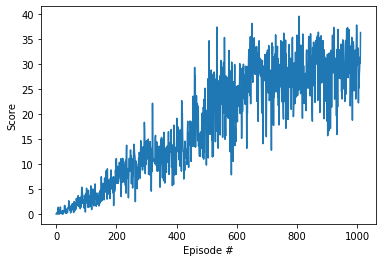

In [8]:
def ddpg(n_episodes=5000, max_t=1000):
    """ Deep Deterministic Policy Gradients
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores_window = deque(maxlen=100)
    scores = np.zeros(num_agents)
    scores_episode = []
    
    agents =[] 
    
    for i in range(num_agents):
        agents.append(Agent(state_size, action_size, random_seed=0))
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        for agent in agents:
            agent.reset()
            
        scores = np.zeros(num_agents)
            
        for t in range(max_t):
            #actions = [agents[i].act(states[i]) for i in range(num_agents)]
            actions = np.array([agents[i].act(states[i]) for i in range(num_agents)])
#             if t == 0:
#                 print("actions", actions)
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations     # get the next state
            rewards = env_info.rewards                     # get the reward
            dones = env_info.local_done        
            
            for i in range(num_agents):
                agents[i].step(t,states[i], actions[i], rewards[i], next_states[i], dones[i]) 
 
            states = next_states
            scores += rewards
            if t % 20:
                print('\rTimestep {}\tScore: {:.2f}\tmin: {:.2f}\tmax: {:.2f}'
                      .format(t, np.mean(scores), np.min(scores), np.max(scores)), end="") 
            if np.any(dones):
                break 
        score = np.mean(scores)
        scores_window.append(score)       # save most recent score
        scores_episode.append(score)

        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_window)), end="\n")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(Agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(Agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores_episode

scores = ddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [9]:
env.close()

### Ideas for improving the agent's performance.

1. Increasing timestep might speedup convergence

2. Changing activation function. This [article](https://arxiv.org/pdf/1804.00361.pdf) suggests that SELU activation function outperformes
Leaky ReLU, Tanh and Sigmoid.

3. Exploring TD3 for implementation [article](https://arxiv.org/pdf/1802.09477.pdf) to adress the unstability and heavy reliance on finding the correct hyper parameters for the current task that DDPG have 

